# Run the code in accesnding order according to the number on each markdown for each section.

## 1. Imports

In [25]:
import os
import sys
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import numpy as np
from nltk.tokenize import RegexpTokenizer
import heapq
import math
import copy
import re
from num2words import num2words
from collections import OrderedDict
import pandas as pd
from itertools import permutations
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import cosine_similarity as cs
from sklearn.model_selection import train_test_split
import pickle
import seaborn as sn
from scipy import stats as s
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score,auc
from matplotlib import pyplot
from keras.utils.np_utils import to_categorical   

## 2. Read all the files and create ground truth dictionary to know which file is present in which folder

In [2]:
path = r'/media/rohit/New Volume/codes/IR/20_newsgroups/subset_Assignment_4'
files = []
files1 = []
folder_dict = {}
print(path)
for r, d, f in os.walk(path):
    for file in sorted(f):
        file_path = os.path.join(r, file)
        if file_path.split('/')[-2] not in folder_dict.keys():
            folder_dict[file_path.split('/')[-2]] = []
        else:
            folder_dict[file_path.split('/')[-2]].append(file.split('/')[-1])
#             print(file.split('/')[-1])
        print(file.split('/')[-1])
        files.append(os.path.join(r, file))
        files1.append(file.split('/')[-1])
print(len(files))

/media/rohit/New Volume/codes/IR/20_newsgroups/subset_Assignment_4
37261
37913
37914
37915
37916
37917
37918
37919
37920
37921
37922
37923
37924
37925
37926
37927
37928
37929
37930
37931
37932
37933
37934
37935
37936
37937
37938
37939
37940
37941
37942
37943
37944
37945
37946
37947
37948
37949
37950
37951
37952
37953
37954
37955
37956
37957
37958
37959
37960
37961
37962
37963
38099
38214
38215
38216
38217
38218
38219
38220
38221
38222
38223
38224
38225
38226
38227
38228
38229
38230
38231
38232
38233
38234
38235
38236
38237
38238
38239
38240
38241
38242
38243
38244
38245
38246
38247
38248
38249
38250
38251
38252
38253
38254
38255
38256
38257
38258
38259
38260
38261
38262
38263
38264
38265
38266
38267
38268
38269
38270
38271
38272
38273
38274
38275
38276
38277
38278
38279
38280
38281
38282
38283
38284
38285
38286
38287
38288
38289
38290
38291
38292
38293
38294
38295
38296
38297
38298
38299
38300
38301
38302
38303
38304
38305
38306
38307
38308
38309
38310
38311
38312
38313
38314
38315
383

61294
61295
61296
61297
61298
61299
61300
61301
61302
61303
61304
61305
61306
61307
61308
61309
61310
61311
61312
61313
61314
61315
61316
61317
61318
61319
61320
61321
61322
61323
61324
61325
61326
61327
61328
61329
61330
61331
61332
61333
61334
61335
61336
61337
61338
61339
61340
61341
61342
61343
61344
61345
61346
61347
61348
61349
61350
61351
61352
61353
61354
61355
61356
61357
61358
61359
61360
61361
61362
61363
61364
61365
61366
61367
61368
61369
61370
61371
61372
61373
61374
61375
61376
61377
61378
61379
61380
61381
61382
61383
61384
61385
61386
61387
61388
61389
61390
61391
61392
61393
61394
61395
61396
61397
61398
61399
61400
61401
61402
61403
61404
61405
61406
61407
61408
61409
61410
61411
61412
61413
61414
61415
61416
61417
61418
61419
61420
61421
61422
61423
61424
61425
61426
61427
61428
61429
61430
61431
61432
61433
61434
61435
61436
61437
61438
61439
61440
61441
61442
61443
61444
61445
61446
61447
61448
61449
61450
61451
61452
61453
61454
61455
61456
61457
61458
61459
6146

In [3]:
folder_dict.keys()

dict_keys(['comp.graphics', 'rec.sport.hockey', 'sci.med', 'sci.space', 'talk.politics.misc'])

In [4]:
len(folder_dict['rec.sport.hockey'])

999

## 3. Preprocessing function

In [5]:
def process_query(query):
    punctuations = '''!()-[]{};:"\,<>./?@#$=+%^&*_~'''
    table = str.maketrans({key:" " for key in punctuations})
    query = query.translate(table)
    table = str.maketrans({key:None for key in "'"})
    query = query.translate(table)
    query = query.lower()
    st = PorterStemmer()
    stemm_list = []
    stop = stopwords.words('english')
    tokenizer = RegexpTokenizer(r'\w+')
    query_list = tokenizer.tokenize(query)
    for j in query_list:
#         if j.isnumeric():
#             j = num2words(j)
        if j in stop:
            j = ''
        stemm_list.append(st.stem(j))
    return stemm_list

## 4. preprocessing and creating data dictionary

In [6]:
data_dict = {}
data = []
count = 0
docid_list = []
for f in files:
#     print(f)
#     sys.exit()
    if '.htm' in f:
        continue
    else:
        filehandle = open(f,errors='ignore')
        # read a single line
        file = (filehandle.read().replace('\n',' '))
        data_dict[f.split('/')[-1]] = set(process_query(file))
        docid_list.append(f.split('/')[-1])
        count = count + 1
        print(count)
# close the pointer to that file
filehandle.close()

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99
100
101
102
103
104
105
106
107
108
109
110
111
112
113
114
115
116
117
118
119
120
121
122
123
124
125
126
127
128
129
130
131
132
133
134
135
136
137
138
139
140
141
142
143
144
145
146
147
148
149
150
151
152
153
154
155
156
157
158
159
160
161
162
163
164
165
166
167
168
169
170
171
172
173
174
175
176
177
178
179
180
181
182
183
184
185
186
187
188
189
190
191
192
193
194
195
196
197
198
199
200
201
202
203
204
205
206
207
208
209
210
211
212
213
214
215
216
217
218
219
220
221
222
223
224
225
226
227
228
229
230
231
232
233
234
235
236
237
238
239
240
241
242
243
244
245
246
247
248
249
250
251
252
253
254
255
256
257
258
259
260
261
262
263
264
265
266
267
268
269
270
271
272
273
274
275
276
277


1876
1877
1878
1879
1880
1881
1882
1883
1884
1885
1886
1887
1888
1889
1890
1891
1892
1893
1894
1895
1896
1897
1898
1899
1900
1901
1902
1903
1904
1905
1906
1907
1908
1909
1910
1911
1912
1913
1914
1915
1916
1917
1918
1919
1920
1921
1922
1923
1924
1925
1926
1927
1928
1929
1930
1931
1932
1933
1934
1935
1936
1937
1938
1939
1940
1941
1942
1943
1944
1945
1946
1947
1948
1949
1950
1951
1952
1953
1954
1955
1956
1957
1958
1959
1960
1961
1962
1963
1964
1965
1966
1967
1968
1969
1970
1971
1972
1973
1974
1975
1976
1977
1978
1979
1980
1981
1982
1983
1984
1985
1986
1987
1988
1989
1990
1991
1992
1993
1994
1995
1996
1997
1998
1999
2000
2001
2002
2003
2004
2005
2006
2007
2008
2009
2010
2011
2012
2013
2014
2015
2016
2017
2018
2019
2020
2021
2022
2023
2024
2025
2026
2027
2028
2029
2030
2031
2032
2033
2034
2035
2036
2037
2038
2039
2040
2041
2042
2043
2044
2045
2046
2047
2048
2049
2050
2051
2052
2053
2054
2055
2056
2057
2058
2059
2060
2061
2062
2063
2064
2065
2066
2067
2068
2069
2070
2071
2072
2073
2074
2075


3533
3534
3535
3536
3537
3538
3539
3540
3541
3542
3543
3544
3545
3546
3547
3548
3549
3550
3551
3552
3553
3554
3555
3556
3557
3558
3559
3560
3561
3562
3563
3564
3565
3566
3567
3568
3569
3570
3571
3572
3573
3574
3575
3576
3577
3578
3579
3580
3581
3582
3583
3584
3585
3586
3587
3588
3589
3590
3591
3592
3593
3594
3595
3596
3597
3598
3599
3600
3601
3602
3603
3604
3605
3606
3607
3608
3609
3610
3611
3612
3613
3614
3615
3616
3617
3618
3619
3620
3621
3622
3623
3624
3625
3626
3627
3628
3629
3630
3631
3632
3633
3634
3635
3636
3637
3638
3639
3640
3641
3642
3643
3644
3645
3646
3647
3648
3649
3650
3651
3652
3653
3654
3655
3656
3657
3658
3659
3660
3661
3662
3663
3664
3665
3666
3667
3668
3669
3670
3671
3672
3673
3674
3675
3676
3677
3678
3679
3680
3681
3682
3683
3684
3685
3686
3687
3688
3689
3690
3691
3692
3693
3694
3695
3696
3697
3698
3699
3700
3701
3702
3703
3704
3705
3706
3707
3708
3709
3710
3711
3712
3713
3714
3715
3716
3717
3718
3719
3720
3721
3722
3723
3724
3725
3726
3727
3728
3729
3730
3731
3732


## 5. Term count and document frequency Dictionary

In [7]:
def create_imp_dicts(X_train):
    term_count_dict = {}
    term_doc_freq = {}
    docid_list = []
    class_doc_count = {}
    count = 0
    for count,file in enumerate(X_train.iloc[:,0]):  
        docid = X_train.iloc[count,-1]
        class_id = X_train.iloc[count,-2]
        length = len(file)
        for term in file:
            if term not in term_count_dict.keys():
                term_count_dict[term] =  {}
            if docid not in term_count_dict[term].keys(): 
                term_count_dict[term][docid] = [1, length] 
            elif docid in term_count_dict[term].keys():
                term_count_dict[term][docid][0] = term_count_dict[term][docid][0] + 1
        for term in set(file):
            if term not in term_doc_freq.keys():
                term_doc_freq[term] = 1
            elif term in term_doc_freq.keys():
                term_doc_freq[term] = term_doc_freq[term] + 1
            if term not in class_doc_count:
                class_doc_count[term] = {}
                class_doc_count[term][class_id] = 1
            elif class_id not in class_doc_count[term]:
                class_doc_count[term][class_id] = 1
            else:
                class_doc_count[term][class_id] += 1
                
    
    number_docs = len(files)
    total_vocab = len(term_doc_freq.keys())
    print(number_docs,total_vocab)
    
    term_freq_dict = copy.deepcopy(term_count_dict)
    for i in term_freq_dict.keys():
        for j in term_freq_dict[i].keys():
            term_freq_dict[i][j] = term_freq_dict[i][j][0]/term_freq_dict[i][j][1]
    
    tf_idf_dict = copy.deepcopy(term_freq_dict)
    for i in tf_idf_dict.keys():
        for j in tf_idf_dict[i].keys():
            tf_idf_dict[i][j] = tf_idf_dict[i][j]*np.log(len(files)/(term_doc_freq[i]+1))
            
    return term_doc_freq,class_doc_count,tf_idf_dict,total_vocab

## 6. TF-IDF feature selection step

In [ ]:
dataset

In [53]:
def tf_idf_feature_selection_step(corpus,term_doc_freq,p):
    query = list(corpus)

    processed_query_set = set(query)
    query_term_count_dict = {}
    count = 0
    length = len(query)
    for term in query:
        if term not in query_term_count_dict.keys():
            query_term_count_dict[term] =  [1,length]
        else:
            query_term_count_dict[term][0] = query_term_count_dict[term][0] + 1 

    query_tfidf_dict = copy.deepcopy(query_term_count_dict)
    for i in query_tfidf_dict.keys():
        query_tfidf_dict[i] = (query_tfidf_dict[i][0]/query_tfidf_dict[i][1])*np.log(len(files)/(term_doc_freq.setdefault(i,0)+1))
    k_keys_sorted = heapq.nlargest(int(len(query)*(p/100)), query_tfidf_dict,key=query_tfidf_dict.get)
    return k_keys_sorted

## 7.load and Split the dataset

In [9]:
def load_split_dataset(p = 30):
    df = pickle.load( open( "/media/rohit/New Volume/codes/IR/Assignment_5/dataset_NB.pkl", "rb" ) )
    X_train, X_test= train_test_split(df, test_size=(p/100))
    X_train=X_train.reset_index(drop=True)
    X_test=X_test.reset_index(drop=True)
    return X_train,X_test

## 8. Classwise data sorting

In [10]:
def classwise(ground_truth_list, train):
    classwise_dict ={}
    for i in ground_truth_list:
        for j in range(train.shape[0]):
            if train.iloc[j,1] == i:
                if i not in classwise_dict.keys():
                    classwise_dict[i] = train.iloc[j,0]
                else:
                    classwise_dict[i] = classwise_dict[i] + train.iloc[j,0]
    return classwise_dict

## 9. counter 

In [11]:
def Counter(anylist):
    count_dict = {}
    for i in anylist:
        if i not in count_dict.keys():
            count_dict[i] = 1
        else:
            count_dict[i] = count_dict[i] + 1
    return count_dict

## 10. For calculating corpus statistics

In [12]:
def get_corpus_statistics(corpus,classwise_dict,selected_words):
    total_words = len(corpus)
    unique_words = len(selected_words)
    classwise_freq_dict = {}
    classwise_word_count = {}
    for i in classwise_dict.keys():
        word_freq_dict = Counter(classwise_dict[i])
        classwise_freq_dict[i] = {}
        for j in selected_words:
            classwise_freq_dict[i][j] = word_freq_dict.setdefault(j,0)
            if i not in classwise_word_count.keys():
                classwise_word_count[i] = word_freq_dict.setdefault(j,0)
            else:
                classwise_word_count[i] = classwise_word_count[i] + word_freq_dict.setdefault(j,0)
    return classwise_freq_dict, classwise_word_count, total_words, unique_words

## 11. Acc and conf matrix

In [13]:
def calc_accuracy(predicted, true):
    tp_tn = len([1 for i in range(len(predicted)) if predicted[i]==true[i]])
    return tp_tn/len(predicted)

In [14]:
def compute_confusion(predicted, true,ground_truth_list):
    confusion = np.zeros((len(ground_truth_list), len(ground_truth_list))).astype(int)
    for i in range(len(predicted)):
        confusion[ground_truth_list.index(predicted[i])][ground_truth_list.index(true[i])] += 1
    sn.heatmap(pd.DataFrame(confusion), annot=True,cmap='Blues', fmt='g')
    return confusion

## 12. Naive bayes

In [64]:
def naive_bayes_classifier(p_split,p_feat_select,option):
    ground_truth_list = list(['comp.graphics', 'rec.sport.hockey', 'sci.med', 'sci.space', 'talk.politics.misc'])
    X_train,X_test = load_split_dataset(p_split)
    term_doc_freq,class_doc_count,tf_idf_dict,total_vocab = create_imp_dicts(X_train)
    _,__,tf_idf_dict_test,___ = create_imp_dicts(X_test)
    classwise_dict = classwise(ground_truth_list, X_train)
    corpus = []
    for i in classwise_dict.keys():
        corpus = corpus + classwise_dict[i]
    if option==1:
        selected_words = tf_idf_feature_selection_step(corpus,term_doc_freq,p_feat_select)
        selected_words = selected_words[:int(len(selected_words)*p_feat_select/100)]

    else: 
        selected_words = mutual_information_feature_selection(class_doc_count,classwise_dict,X_train, p_feat_select)

    classwise_freq_dict, classwise_word_count, total_words, unique_words = get_corpus_statistics(corpus,classwise_dict,selected_words)
    train_labels = Counter(X_train.iloc[:,1])
    test_labels = []
    predicted = []
    for i in range(X_test.shape[0]):
        test_labels.append(X_test.iloc[i,1])
        classes_words_probability = []
        for l in classwise_dict.keys():
            words_probability = 0
            for word in X_test.iloc[i,0]:
                fr, cn = classwise_freq_dict.setdefault(l,{}).setdefault(word,0), classwise_word_count[l]
                pp = (fr + 1) / (cn + unique_words)
                words_probability += np.log(pp)
            words_probability += np.log(train_labels[l] / X_train.shape[0])
            classes_words_probability.append(words_probability)
#         print("hiiiiii",classes_words_probability)
        predicted.append(ground_truth_list[np.argmax(classes_words_probability)])

    print(compute_confusion(predicted, test_labels,ground_truth_list))
    print(calc_accuracy(predicted, test_labels))
    y_test = []
    y_score = []
    for i in X_test.iloc[:,-2]:
        if i == ground_truth_list[0]:
            y_test.append(0)
        if i == ground_truth_list[1]:
            y_test.append(1)
        if i == ground_truth_list[2]:
            y_test.append(2)
        if i == ground_truth_list[3]:
            y_test.append(3)
        if i == ground_truth_list[4]:
            y_test.append(4)
    for i in predicted:
        if i == ground_truth_list[0]:
            y_score.append(0)
        if i == ground_truth_list[1]:
            y_score.append(1)
        if i == ground_truth_list[2]:
            y_score.append(2)
        if i == ground_truth_list[3]:
            y_score.append(3)
        if i == ground_truth_list[4]:
            y_score.append(4)
    y_test = to_categorical(y_test)
    y_score = to_categorical(y_score)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(5):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
    for i in range(5):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve {}(area = {})'.format(i, roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

5000 46326
5000 30754
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
1810

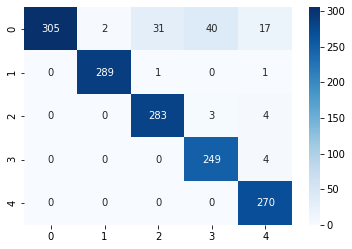

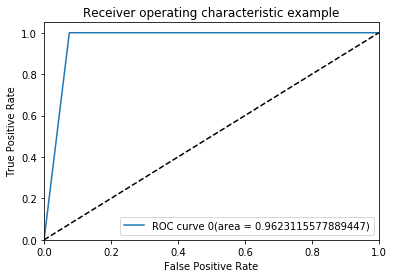

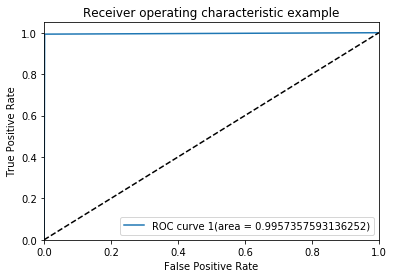

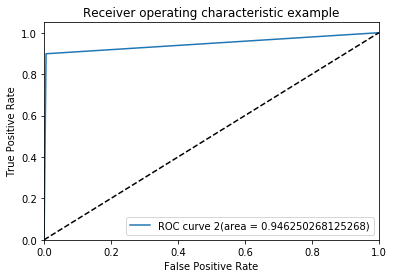

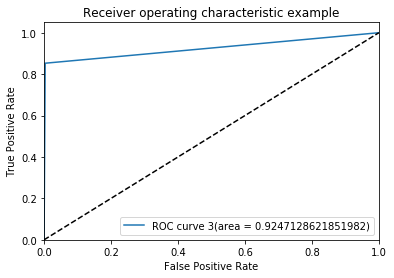

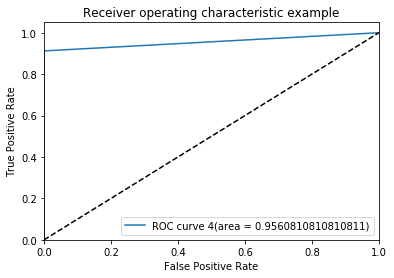

In [59]:
naive_bayes_classifier(30,10,0)

5000 40345
5000 38510
[[529   3  41  33   4]
 [  0 495   1   0   0]
 [  2   0 426   3   1]
 [  1   0   2 451   3]
 [  0   1   2   1 499]]
0.9607686148919136


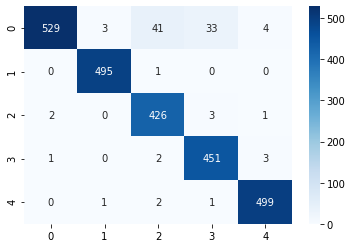

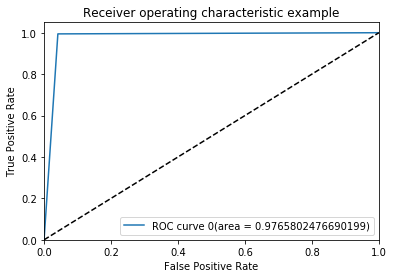

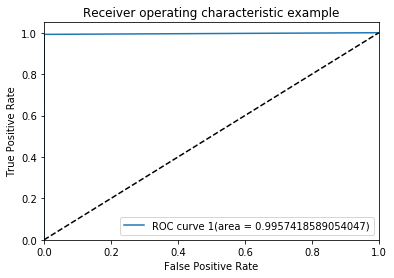

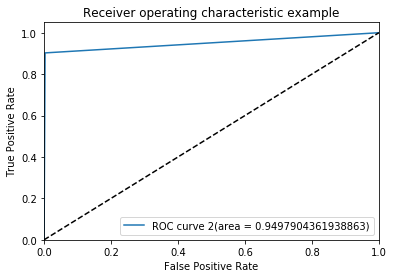

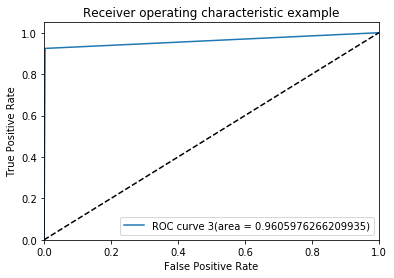

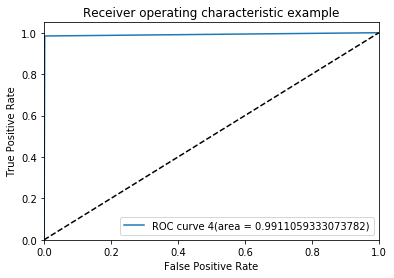

In [65]:
naive_bayes_classifier(50,10,1)

5000 50526
5000 22779
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
1810

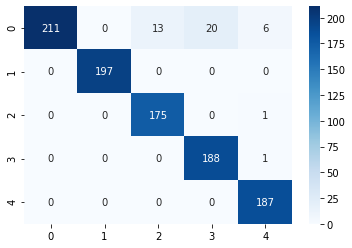

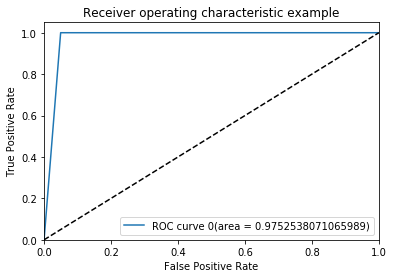

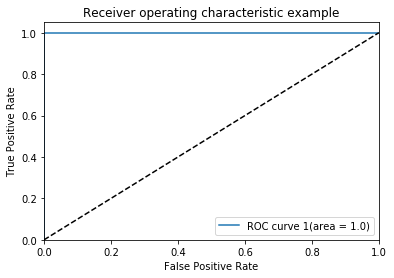

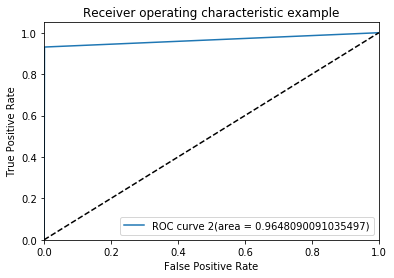

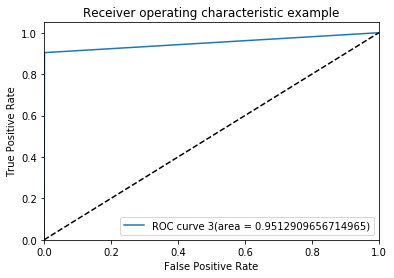

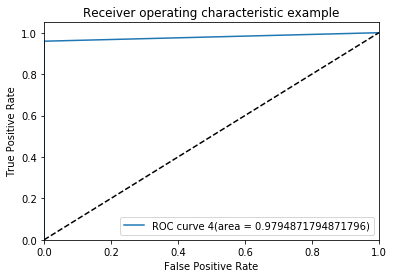

In [62]:
naive_bayes_classifier(20,10,0)

## cosine similarity

In [38]:
def cosine_sim(a, b):
    cos_sim = np.dot(a, np.transpose(b))/(np.linalg.norm(a)*np.linalg.norm(b))
    return cos_sim
def cosine_similarity(Q,D,k=5):
    sorted_cosine_similarity_dict = {}
    cosine_similarity_dict = {}
    for count,i in enumerate(Q.iloc[:,0]):
        test_doc = Q.iloc[count,-1]
        cosine_similarity_dict[test_doc] = {}
        for count1,d in enumerate(D.iloc[:,0]):
            train_doc = D.iloc[count1,-1]
            cosine_similarity_dict[test_doc][train_doc] = cosine_sim(i, d)
    for i in cosine_similarity_dict.keys():
        sorted_cosine_similarity_dict[i] = OrderedDict(sorted(cosine_similarity_dict[i].items(), key=lambda x: x[1],reverse =True))   
    final_cosine_similarity_dict = {}
    for i in sorted_cosine_similarity_dict.keys():
        final_cosine_similarity_dict[i] = {}
        for j in list(sorted_cosine_similarity_dict[i].keys())[:k]:
            final_cosine_similarity_dict[i][j] = D.iloc[(D.loc[D.iloc[:,-1]==j].index),-2].values[0]
    return final_cosine_similarity_dict

## Vectorize Train and test

In [39]:
def vectorize(selected_words,tf_idf_dict,tf_idf_dict_test,X_train,X_test):
    X = []
    y = []
    train = pd.DataFrame(columns=['X','labels'])
    test = pd.DataFrame(columns=['X','labels'])
    vector_dict = {}
    for doc_id in X_test.iloc[:,-1]:
        vector_dict[doc_id] = np.zeros((len(selected_words)))
    count = 0
    for col,term in enumerate(selected_words):
        for doc in tf_idf_dict[term].keys():
            if doc not in vector_dict.keys():
                vector_dict[doc] = np.zeros((len(selected_words)))
                vector_dict[doc][col] = tf_idf_dict[term][doc]
            else:
                vector_dict[doc][col] = tf_idf_dict[term][doc]
        if term not in tf_idf_dict_test.keys():
            for doc in vector_dict.keys():
                vector_dict[doc][col] = 0
        else:
            for doc in tf_idf_dict_test[term].keys():
                vector_dict[doc][col] = tf_idf_dict_test[term][doc]
    for count,i in enumerate(X_train.iloc[:,-1]):
        X.append(vector_dict[i])
        y.append(X_train.iloc[count,-2])
    X_train['X'] = X
    X_train['labels'] = y
    X=[]
    y=[]
    
    for count,i in enumerate(X_test.iloc[:,-1]):
        X.append(vector_dict[i])
        y.append(X_test.iloc[count,-2])
    X_test['X'] = X
    X_test['labels'] = y
        
    return X_train,X_test

## mutual information

In [40]:
def mutual_information_feature_selection(class_doc_count,classwise_dict,X_train,p_feat_select):
    #['comp.graphics', 'rec.sport.hockey', 'sci.med', 'sci.space', 'talk.politics.misc']
    class_term_MI = {}
    for class_id in classwise_dict.keys():
        class_term_MI[class_id] = {}
    for count,term in enumerate(class_doc_count.keys()):
        if count%100==0:
            print(count)
        class_ids=list(class_doc_count[term].keys())
        for class_id in class_ids:
            class_term_MI[class_id][term] = 0
            N11 = class_doc_count[term][class_id]
            if class_id == 'comp.graphics':
                N10 = class_doc_count[term].setdefault('rec.sport.hockey',0) + class_doc_count[term].setdefault('sci.med',0) + class_doc_count[term].setdefault('sci.space',0) + class_doc_count[term].setdefault('talk.politics.misc',0)
            elif class_id == 'rec.sport.hockey':
                N10 = class_doc_count[term].setdefault('comp.graphics',0) + class_doc_count[term].setdefault('sci.med',0) + class_doc_count[term].setdefault('sci.space',0) + class_doc_count[term].setdefault('talk.politics.misc',0)
            elif class_id == 'sci.med':
                N10 = class_doc_count[term].setdefault('comp.graphics',0) + class_doc_count[term].setdefault('rec.sport.hockey',0) + class_doc_count[term].setdefault('sci.space',0) + class_doc_count[term].setdefault('talk.politics.misc',0)
            elif class_id == 'sci.space':
                N10 = class_doc_count[term].setdefault('comp.graphics',0) + class_doc_count[term].setdefault('sci.med',0) + class_doc_count[term].setdefault('rec.sport.hockey',0) + class_doc_count[term].setdefault('talk.politics.misc',0)
            elif class_id == 'talk.politics.misc':
                N10 = class_doc_count[term].setdefault('comp.graphics',0) + class_doc_count[term].setdefault('sci.med',0) + class_doc_count[term].setdefault('sci.space',0) + class_doc_count[term].setdefault('rec.sport.hockey',0)
#             print(X_train.loc[X_train.iloc[:,-2] == class_id].shape[0])
            N01 = X_train.loc[X_train.iloc[:,-2] == class_id].shape[0] - N11
            N00 = X_train.shape[0] - (N01+N11+N10)
            N1_ = N10 + N11
            N_1 = N01 + N11
            N0_ = N01 + N00
            N_0 = N10 + N00
            N = N11 + N10 + N01 + N00
#             print(N11,N10,N01,N00,N)
            class_term_MI[class_id][term] = (N11/N)*math.log2((N*N11+1)/(N1_*N_1+1)) + (N01/N)*math.log2((N*N01+1)/(N0_*N_1+1)) + (N10/N)*math.log2((N*N10+1)/(N1_*N_0+1)) + (N00/N)*math.log2((N*N00+1)/(N0_*N_0+1))

    selected_words = []
    for class_id in class_term_MI.keys():
        class_term_MI[class_id] = OrderedDict(sorted(class_term_MI[class_id].items(), key=lambda x: x[1], reverse = True))
        length = len(class_term_MI[class_id].keys())
        for term in list(class_term_MI[class_id].keys())[:int(length*(p_feat_select/100))]:
            selected_words.append(term)
    
    return set(selected_words)
    

## KNN

In [51]:
def KNN_classifier(p_split,p_feat_select,option,k):
    ground_truth_list = list(['comp.graphics', 'rec.sport.hockey', 'sci.med', 'sci.space', 'talk.politics.misc'])
    X_train,X_test = load_split_dataset(p_split)
    term_doc_freq,class_doc_count,tf_idf_dict,total_vocab = create_imp_dicts(X_train)
    _,__,tf_idf_dict_test,___ = create_imp_dicts(X_test)
    classwise_dict = classwise(ground_truth_list, X_train)
    corpus = []
    for i in classwise_dict.keys():
        corpus = corpus + classwise_dict[i]
    if option==1:
        selected_words = tf_idf_feature_selection_step(corpus,term_doc_freq,p_feat_select)
        selected_words = selected_words[:int(len(selected_words)*p_feat_select/100)]
    else: 
        selected_words = mutual_information_feature_selection(class_doc_count,classwise_dict,X_train, p_feat_select)
    print(len(selected_words))
    X_train,X_test = vectorize(selected_words,tf_idf_dict,tf_idf_dict_test,X_train,X_test)
    final_cosine_similarity_dict = cosine_similarity(X_test,X_train,k)
    predicted_labels = []
    for i in X_test.iloc[:,-1]:
        l=[]
        l=[final_cosine_similarity_dict[i][s] for s in final_cosine_similarity_dict[i].keys()]
        predicted_labels.append(s.mode(l)[0])
    
    print(compute_confusion(predicted_labels,X_test.iloc[:,-2],ground_truth_list))
    print(calc_accuracy(predicted_labels,X_test.iloc[:,-2]))
    y_test = []
    y_score = []
    for i in X_test.iloc[:,-2]:
        if i == ground_truth_list[0]:
            y_test.append(0)
        if i == ground_truth_list[1]:
            y_test.append(1)
        if i == ground_truth_list[2]:
            y_test.append(2)
        if i == ground_truth_list[3]:
            y_test.append(3)
        if i == ground_truth_list[4]:
            y_test.append(4)
    for i in predicted_labels:
        if i == ground_truth_list[0]:
            y_score.append(0)
        if i == ground_truth_list[1]:
            y_score.append(1)
        if i == ground_truth_list[2]:
            y_score.append(2)
        if i == ground_truth_list[3]:
            y_score.append(3)
        if i == ground_truth_list[4]:
            y_score.append(4)
    y_test = to_categorical(y_test)
    y_score = to_categorical(y_score)
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    for i in range(5):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

# Plot of a ROC curve for a specific class
    for i in range(5):
        plt.figure()
        plt.plot(fpr[i], tpr[i], label='ROC curve {}(area = {})'.format(i, roc_auc[i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('Receiver operating characteristic example')
        plt.legend(loc="lower right")
        plt.show()

5000 39868
5000 38683
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
1810

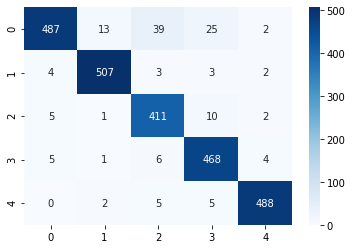

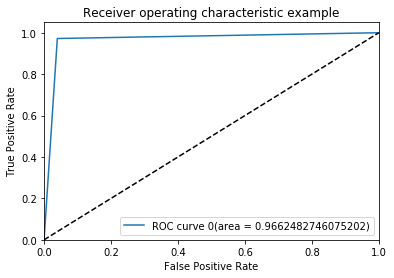

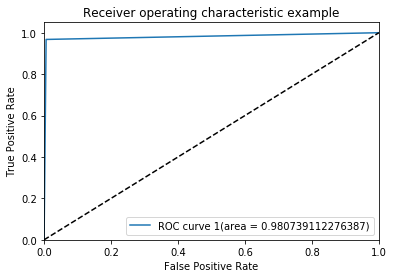

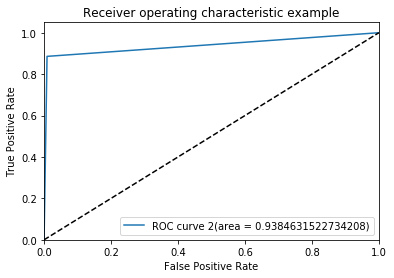

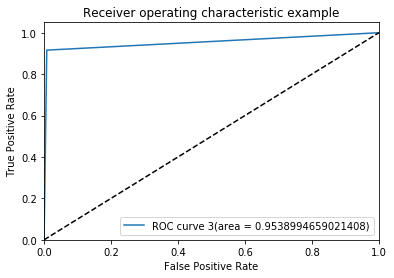

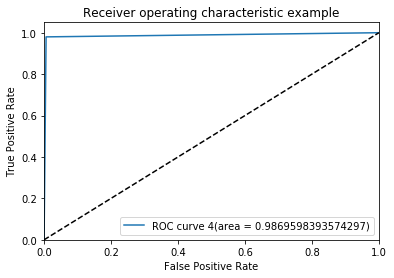

In [56]:
final_cosine_similarity_dict = KNN_classifier(50,10,0,5)

5000 46582
5000 30915
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
1810

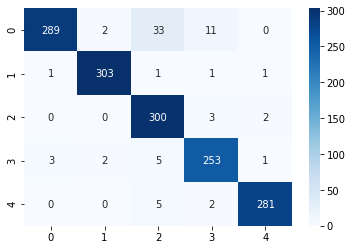

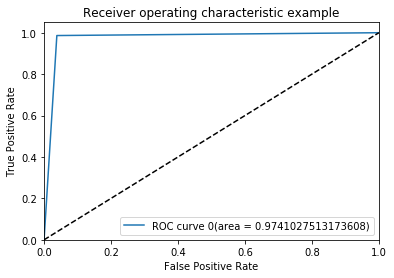

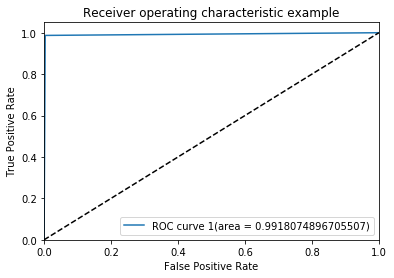

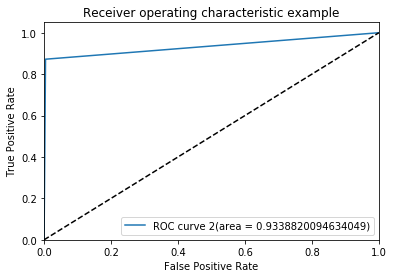

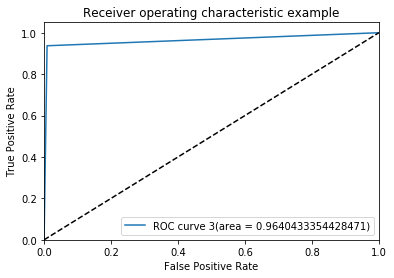

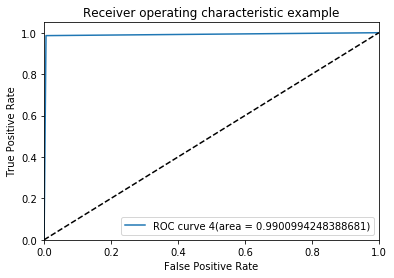

In [57]:
final_cosine_similarity_dict = KNN_classifier(30,10,0,5)

5000 50226
5000 24142
0
100
200
300
400
500
600
700
800
900
1000
1100
1200
1300
1400
1500
1600
1700
1800
1900
2000
2100
2200
2300
2400
2500
2600
2700
2800
2900
3000
3100
3200
3300
3400
3500
3600
3700
3800
3900
4000
4100
4200
4300
4400
4500
4600
4700
4800
4900
5000
5100
5200
5300
5400
5500
5600
5700
5800
5900
6000
6100
6200
6300
6400
6500
6600
6700
6800
6900
7000
7100
7200
7300
7400
7500
7600
7700
7800
7900
8000
8100
8200
8300
8400
8500
8600
8700
8800
8900
9000
9100
9200
9300
9400
9500
9600
9700
9800
9900
10000
10100
10200
10300
10400
10500
10600
10700
10800
10900
11000
11100
11200
11300
11400
11500
11600
11700
11800
11900
12000
12100
12200
12300
12400
12500
12600
12700
12800
12900
13000
13100
13200
13300
13400
13500
13600
13700
13800
13900
14000
14100
14200
14300
14400
14500
14600
14700
14800
14900
15000
15100
15200
15300
15400
15500
15600
15700
15800
15900
16000
16100
16200
16300
16400
16500
16600
16700
16800
16900
17000
17100
17200
17300
17400
17500
17600
17700
17800
17900
18000
1810

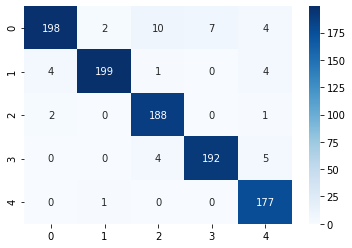

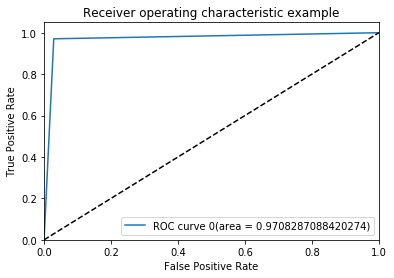

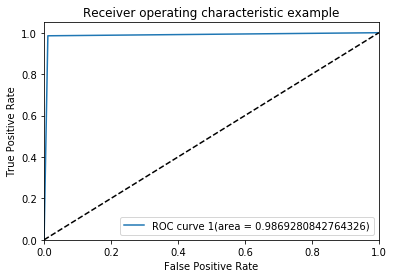

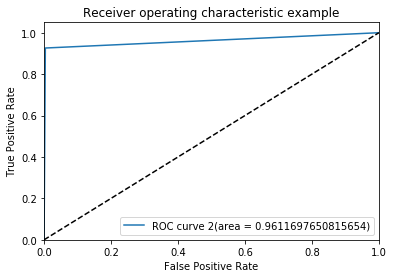

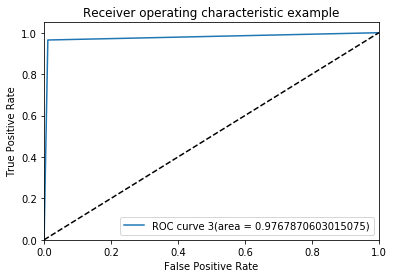

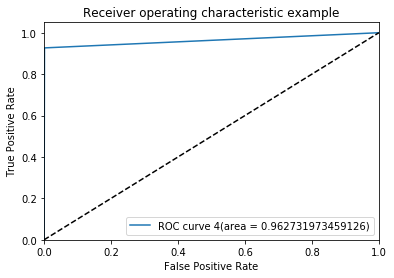

In [58]:
final_cosine_similarity_dict = KNN_classifier(20,10,0,5)

## for data prep(DO NOT RUN)

In [ ]:
def create_dataset(data_dict,folder_dict):
    dataset = pd.DataFrame(columns=['X','labels','doc_id'])
    X = []
    y = []
    doc_id = []
    for count,i in enumerate(data_dict.keys()):
        if i in folder_dict['comp.graphics']:
            X.append(list(data_dict[i]))
            y.append('comp.graphics')
            doc_id.append(i)
        elif i in folder_dict['rec.sport.hockey']:
            X.append(list(data_dict[i]))
            y.append('rec.sport.hockey')
            doc_id.append(i)
        elif i in folder_dict['sci.med']:
            X.append(list(data_dict[i]))
            y.append('sci.med')
            doc_id.append(i)

        elif i in folder_dict['sci.space']:
            X.append(list(data_dict[i]))
            y.append('sci.space')
            doc_id.append(i)
        elif i in folder_dict['talk.politics.misc']:
            X.append(list(data_dict[i]))
            y.append('talk.politics.misc')
            doc_id.append(i)
    print(np.array(X).shape,np.array(y).shape)    
    dataset['X'] = X
    dataset['labels'] = np.array(y)
    dataset['doc_id'] = np.array(doc_id)
    dataset = dataset.sample(frac=1,random_state=4)        
    return dataset

dataset = create_dataset(data_dict,folder_dict)

dataset.to_pickle("/media/rohit/New Volume/codes/IR/Assignment_5/dataset_NB.pkl")